In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.python.keras.losses import mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv("/thesis_code/thesis/webapp/dataset/data_for_model.csv")
df.shape

(4018, 23)

In [5]:
df

,Unnamed: 0,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,...,humidity,precip,precipcover,cloudcover,windspeed,visibility,is_heating_season,is_work_day,winddir_sin,winddir_cos
0,2014-01-01,1057.0,31.3,67.6,56.0,6.96,1121.0,19.9,27.5,9.3,...,91.5,0.000,0.00,58.3,7.3,2.6,1,1,0.979223,-0.202787
1,2014-01-02,1030.0,37.0,89.1,60.0,11.12,1212.0,25.9,44.4,9.9,...,83.0,0.000,0.00,60.4,10.9,6.4,1,1,0.685818,-0.727773
2,2014-01-03,1319.0,49.1,196.1,69.0,10.18,1292.0,26.3,60.5,7.5,...,82.9,0.000,0.00,61.5,14.3,11.0,1,1,0.068015,-0.997684
3,2014-01-04,1001.0,36.9,94.8,46.0,11.66,952.0,21.6,27.3,7.6,...,88.5,0.398,4.17,83.2,17.9,8.0,1,0,0.432086,-0.901833
4,2014-01-05,1155.0,37.3,102.6,39.0,9.32,1001.0,23.4,36.6,12.5,...,79.0,0.300,12.50,92.1,21.4,18.0,1,0,0.436802,-0.899558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,793.0,46.0,161.3,31.0,4.32,841.0,23.8,38.8,13.1,...,88.4,0.000,0.00,41.7,9.4,7.9,1,1,-0.564967,-0.825113
4014,2024-12-28,570.2,21.2,48.4,15.0,5.10,651.0,9.2,11.3,24.9,...,99.0,0.000,0.00,87.4,7.5,0.5,1,0,-0.366501,-0.930418
4015,2024-12-29,738.0,18.1,35.2,24.0,5.10,698.0,8.3,9.1,35.0,...,99.7,0.000,0.00,98.2,9.3,1.8,1,0,-0.166769,-0.985996
4016,2024-12-30,674.0,23.7,46.5,35.0,4.50,765.0,11.4,12.1,38.8,...,98.0,0.000,0.00,98.7,9.4,2.5,1,0,-0.183951,-0.982935


In [6]:
df["Date"] = df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.set_index("Date", inplace=True)

In [8]:
df.isna().sum()

Station1_CO            0
Station1_NO2           0
Station1_NOx           0
Station1_PM10          0
Station1_SO2           0
Station2_CO            0
Station2_NO2           0
Station2_NOx           0
Station2_O3          158
Station2_PM10          0
Station2_SO2           0
temp                   0
humidity               0
precip                 0
precipcover            0
cloudcover             0
windspeed              0
visibility             0
is_heating_season      0
is_work_day            0
winddir_sin            0
winddir_cos            0
dtype: int64

In [9]:
features = [
    "Station1_CO", "Station1_NO2", "Station1_NOx",
    "Station2_CO", "Station2_NO2", "Station2_NOx", "Station2_O3",
    "Station1_PM10", "temp", "humidity", "precip",
    "precipcover", "cloudcover", "windspeed", "visibility",
    "winddir_sin", "winddir_cos", "is_heating_season", "is_work_day"
]
target = "Station2_PM10"

In [10]:
print(df.isnull().sum())
df.fillna(method="ffill", inplace=True) 

Station1_CO            0
Station1_NO2           0
Station1_NOx           0
Station1_PM10          0
Station1_SO2           0
Station2_CO            0
Station2_NO2           0
Station2_NOx           0
Station2_O3          158
Station2_PM10          0
Station2_SO2           0
temp                   0
humidity               0
precip                 0
precipcover            0
cloudcover             0
windspeed              0
visibility             0
is_heating_season      0
is_work_day            0
winddir_sin            0
winddir_cos            0
dtype: int64


/var/folders/0c/_lmn88gn06gfqbnmjydqyxgm0000gn/T/ipykernel_2510/115979551.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [11]:
df.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/result_data.csv")

In [12]:
scaler_target = MinMaxScaler()
df[target] = scaler_target.fit_transform(df[target].values.reshape(-1, 1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.2,
    random_state=42
)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_test_actual = scaler_target.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_actual = scaler_target.inverse_transform(y_pred.reshape(-1, 1)).flatten()

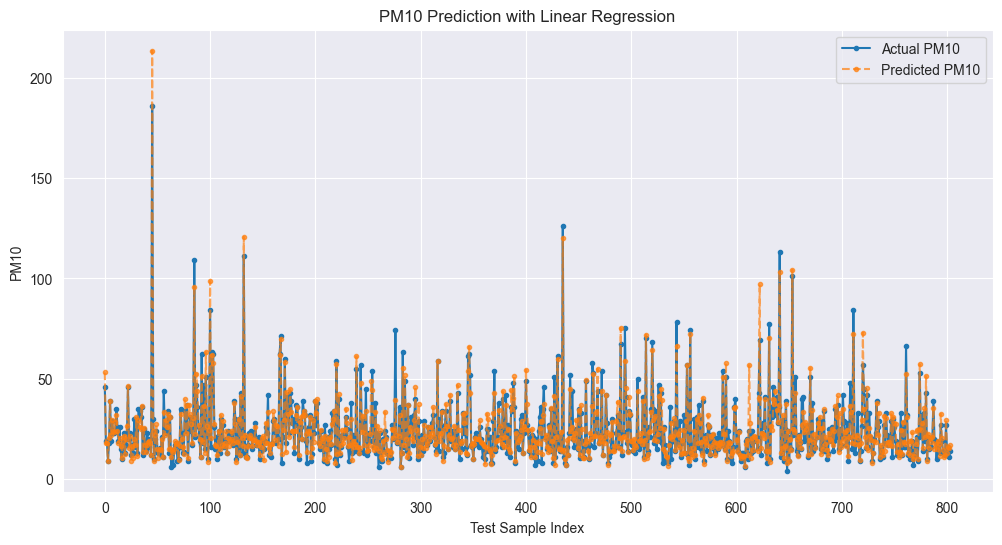

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual PM10', marker='.')
plt.plot(y_pred_actual, label='Predicted PM10', marker='.', alpha=0.7, linestyle='dashed')
plt.legend()
plt.title('PM10 Prediction with Linear Regression')
plt.xlabel('Test Sample Index')
plt.ylabel('PM10')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"MAE: {mae}")
mse = mean_squared_error(y_test_actual, y_pred_actual)
print(f"MSE: {mse}")
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R2: {r2}")

In [ ]:
import joblib

joblib.dump(model, 'pm10_prediction_model.pkl')